<a href="https://colab.research.google.com/github/ajalamarvellous/flower-classification/blob/main/AI_Saturday_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ajalamarvellous","key":"1d9375d1c20debc4523fe121cf986520"}'}

In [ ]:
!ls

ai6-dl-cohort-6-challenge.zip  kaggle.json  sample_data


In [ ]:
 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c ai6-dl-cohort-6-challenge

401 - Unauthorized


In [33]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/25593/1931529/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1613453541&Signature=j89EuNnN8%2FLaDodGnAhcoGSUjRwYgrXspcvmh3fvuNiRATvFo%2FPodvoqq6MPaKCu9ZztVIGT2f2MQsj6N8K33fif0YP4bXs9QPUA%2FnnGX6KOEEQRZ5T0arw2CUCuVPbVM%2BFxxzJk873PCdXiv2rSyXY8knP6SlfzCh5X8TrS%2F7wL%2FTBu%2BVf61KOSls1VopvNvbXjDcLnk0vifAaYRSAKejQKjocikyOQij%2FZUIPwUXnN2ztEXIOcq0fuPCT1PBIfHxJERSKWctewka5ezJsZApUdiFl1zFevb4%2FpXR10VXTkg3NboYy4mRK%2B5UsenhRJxZ9Dp5dCrr7PBxos0JI6Dw%3D%3D&response-content-disposition=attachment%3B+filename%3Dai6-dl-cohort-6-challenge.zip" -c -O 'ai6-dl-cohort-6-challenge.zip'

--2021-02-13 05:59:27--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/25593/1931529/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1613453541&Signature=j89EuNnN8%2FLaDodGnAhcoGSUjRwYgrXspcvmh3fvuNiRATvFo%2FPodvoqq6MPaKCu9ZztVIGT2f2MQsj6N8K33fif0YP4bXs9QPUA%2FnnGX6KOEEQRZ5T0arw2CUCuVPbVM%2BFxxzJk873PCdXiv2rSyXY8knP6SlfzCh5X8TrS%2F7wL%2FTBu%2BVf61KOSls1VopvNvbXjDcLnk0vifAaYRSAKejQKjocikyOQij%2FZUIPwUXnN2ztEXIOcq0fuPCT1PBIfHxJERSKWctewka5ezJsZApUdiFl1zFevb4%2FpXR10VXTkg3NboYy4mRK%2B5UsenhRJxZ9Dp5dCrr7PBxos0JI6Dw%3D%3D&response-content-disposition=attachment%3B+filename%3Dai6-dl-cohort-6-challenge.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothi

In [ ]:
!unzip ai6-dl-cohort-6-challenge.zip

Streaming output truncated to the last 5000 lines.
  inflating: flower_data/train/37/image_03816.jpg  
  inflating: flower_data/train/37/image_03817.jpg  
  inflating: flower_data/train/37/image_03818.jpg  
  inflating: flower_data/train/37/image_03819.jpg  
  inflating: flower_data/train/37/image_03823.jpg  
  inflating: flower_data/train/37/image_03824.jpg  
  inflating: flower_data/train/37/image_03825.jpg  
  inflating: flower_data/train/37/image_03826.jpg  
  inflating: flower_data/train/37/image_03827.jpg  
  inflating: flower_data/train/37/image_07285.jpg  
  inflating: flower_data/train/37/image_07286.jpg  
  inflating: flower_data/train/37/image_07287.jpg  
  inflating: flower_data/train/37/image_07288.jpg  
  inflating: flower_data/train/37/image_07289.jpg  
  inflating: flower_data/train/37/image_07290.jpg  
  inflating: flower_data/train/37/image_07291.jpg  
  inflating: flower_data/train/37/image_07292.jpg  
  inflating: flower_data/train/37/image_07293.jpg  
  inflating: 

In [ ]:
 import os, sys, gc
import numpy as np
import pandas as pd
import random
# import ignite
import copy
from tqdm import tqdm
 
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision import *
 
from PIL import Image
import albumentations
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from random import shuffle 
%matplotlib inline

In [ ]:
print(torch.__version__)
print(torch.cuda.is_available())

1.7.0+cu101
True


In [ ]:
def seedall(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.backends.cudnn.deterministic = True
 
seedall(17)

In [ ]:
#num of jobs to run simultaneously
num_workers = 0
 
#number of samples by batch
batch_size = 32
 
#percentage to use for validation
valid_size = 0.2
 
#directory/ file path
train = "flower_data/train/"

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms

In [ ]:
#applying some transformation to the image while converting to tensor
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.Resize([224,224]),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5], [0.2,0.2,0.2])
                               ])
 
train_data = datasets.ImageFolder(train, transform = transform)
 
#len of training data
data_len = len(train_data)
indices = [x for x in range(data_len)]
 
#shuffling the list of the length
np.random.shuffle(indices)
 
#creating fraction for validation and train
split = int(np.floor(valid_size*data_len))
 
train_idx, valid_idx = indices[split:], indices[:split]
 
train_sample =SubsetRandomSampler(train_idx)
valid_sample = SubsetRandomSampler(valid_idx)
 
#Preparing the trainloader
train_loader = torch.utils.data.DataLoader(train_data, batch_size= batch_size, 
       sampler = train_sample, num_workers= num_workers)
 
#Preparing the loader for validation data
valid_loader = torch.utils.data.DataLoader(train_data, batch_size= batch_size, 
       sampler = valid_sample, num_workers= num_workers)

In [ ]:
samples, labels = iter(train_loader).next()
samples.shape

torch.Size([32, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


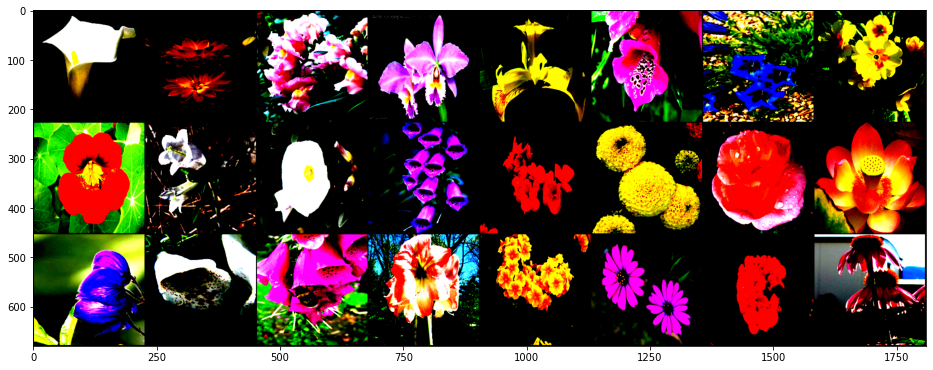

In [ ]:
samples, labels = iter(train_loader).next()
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples[:24])
np_grid_imgs = grid_imgs.numpy()
# in tensor, image is (batch, width, height), so you have to transpose it to (width, height, batch) in numpy to show it.
plt.imshow(np.transpose(np_grid_imgs, (1,2,0)))

In [ ]:
 
class EarlyStopping:
    """Stops the model early if it's no longer improving"""
    def __init__(self, patience = 5, verbose = False, delta = 0):
        """ patience = how long the model should wait if it's not improving before it should shut it down
            verbose = bool to print message whenever the validation loss reduces
            Delta = minimum change to occur in quantified quantity to know change has occurred """
    
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.min_val_loss = np.Inf
        self.early_stop = False
 
    def __call__(self, val_loss, model):
        #setting validation loss to score
        score = -val_loss
 
        #if there is no best score before, set score as best score
        if self.best_score == None:
            self.best_score = score
            self.save_checpoint(val_loss, model)
        """ if score is less than the best score plus delta start counting, if more than patience, then abort """
        elif score  < self.best_score + self.delta:
            self.counter +=1
            print(f"Early stopping counter: {self.counter} out of {self.patience}")
            if self.counter > self.patience:
                self.early_stop = True
        """if the score is better than best score, change to best score to score and save the model"""
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0
 
    """ saving the model"""
    def save_checkpoint(self, val_loss, model):
        if verbose:
            print(f"the new validation loss is {val_loss} from {self.min_val_loss}..........saving the model")
        torch.save(model.state_dict(), "models/"+f"best_model.pth")
        self.min_val_loss= val_ loss

SyntaxError: ignored

In [58]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
 
    def __call__(self, val_loss, model):
 
        score = -val_loss
 
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0
 
    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), "models/"+f"bestmodel.pth")
        self.val_loss_min = val_loss

In [ ]:
import torch.nn.functional as F

In [ ]:
 
N0 = 224*224*3
MLP = nn.Sequential(nn.Linear(N0, 5000),
                          nn.ReLU(),
                          nn.Dropout(p= 0.2),
                          nn.Linear(5000,3000),
                          nn.ReLU(),
                          nn.Dropout(p=0.2),
                          nn.Linear(3000, 1800),
                          nn.ReLU(),
                          nn.Dropout(p=0.2),
                          nn.Linear(1800,1000),
                          nn.ReLU(),
                          nn.Dropout(0.2),
                          nn.Linear(1000,700),
                          nn.ReLU(),
                          nn.Dropout(0.2),
                          nn.Linear(700,350),
                          nn.ReLU(),
                          nn.Linear(350,102),
                          nn.LogSoftmax(dim= 1))

In [ ]:
custom_convnet = nn.Sequential(nn.Conv2d(3, 16, kernel_size= 2, padding=1),
                        nn.ReLU(),
                        nn.MaxPool2d(2),
                        nn.Dropout2d(p=0.2),
                        nn.Conv2d(16,32, kernel_size= 2, padding=1),
                        nn.ReLU(),
                        nn.MaxPool2d(2),
                        nn.Dropout2d(p=0.2),
                        nn.Conv2d(32,64,kernel_size=2, padding = 1),
                        nn.ReLU(),
                        nn.MaxPool2d(2),
                        nn.Dropout2d(0.2),
                        nn.Conv2d(64,128,kernel_size = 2,padding=1),
                        nn.ReLU(),
                        nn.MaxPool2d(2),
                        nn.Dropout(p=0.2),
                        nn.Conv2d(128,256, kernel_size = 2,padding=1),
                        nn.ReLU(),
                        nn.MaxPool2d(2),
                        nn.Dropout2d(p=0.2),
                        nn.Conv2d(256, 512,kernel_size =2, padding= 1),
                        nn.ReLU(),
                        nn.MaxPool2d(2),
                        nn.Dropout2d(p=0.2),
                        nn.Linear(4096, 3000),
                        nn.ReLU(),
                        nn.Dropout(p=0.2),
                        nn.Linear(3000,1000),
                        nn.ReLU(),
                        nn.Dropout(0.2),
                        nn.Linear(1000,500),
                        nn.ReLU(),
                        nn.Linear(500,102),
                        nn.LogSoftmax(dim=1))

In [ ]:
import torchvision.models as models

In [ ]:
resnet = models.resnet18(pretrained=False)
alexnet = models.alexnet(pretrained=False)
vggnet = models.vgg13(pretrained=False)
#googlenet = models.googlenet(pretrained=False)

In [69]:
resnet.fc

Linear(in_features=512, out_features=1000, bias=True)

In [77]:
import torch.optim as optim
vggnet = models.vgg13(pretrained= True)
out = 102
in_layer = vggnet.classifier[0].in_features
 
last  = nn.Sequential(nn.Linear(in_layer, 5000),
                      nn.ReLU(),
                      nn.Dropout(),
                      nn.Linear(5000,out),
                      nn.LogSoftmax(dim=1))
vggnet.classifier = last
 
device = "cuda"
vggnet= vggnet.to(device)
 
resnet = models.resnet18(pretrained= True)
inl = resnet.fc.in_features
out = 102
fc = nn.Sequential( nn.Linear(inl, out), nn.LogSoftmax(dim=1))
resnet.fc = fc
resnet = resnet.to(device)
 
criterion = nn.NLLLoss()
 
optimiser = optim.Adam(resnet.parameters(), lr= 0.00025)
 
early_stopping = EarlyStopping(patience=7, verbose= True)

In [75]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
vggnet

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): 

Training the model now

In [78]:
directory = "models/"
train_loss, valid_loss, valid_accuracy = [],[],[]
epoch = 15
model = resnet
 
for x in range(epoch):
 
    if not os.path.exists(directory):
        os.makedirs(directory)
    model.train
    loss= 0
    train_counter = 0
    for q, (sample, labels) in tqdm(enumerate(train_loader),total=int(len(train_data)/train_loader.batch_size) ):
        train_counter +=1
        sample, labels = sample.to(device), labels.to(device)
        optimiser.zero_grad()
        forward= model(sample)
        epoch_loss = criterion( forward, labels)
        epoch_loss.backward()
        optimiser.step()
        loss += epoch_loss.item()
 
    loss = loss/train_counter
    train_loss.append(loss)
 
    val_loss = 0
    accuracy = 0
    with torch.no_grad():
        for batch_idx,(sample, labels) in enumerate(valid_loader):
            sample, labels = sample.to(device), labels.to(device)
            forward = model(sample)
            val_los = criterion(forward, labels)
            val_loss = val_los.item()
            forward = F.softmax(forward)
            top_k, top_class = forward.topk(1, dim=1)
            eval= labels == top_class.view(labels.shape)
            accuracy = torch.mean(eval.type(torch.FloatTensor))
 
    val_loss /= len(valid_loader)
    valid_loss.append(val_loss)
    valid_accuracy.append(accuracy)
    print(f"Epoch {x}/{epoch}.......training loss {loss:.6f}...... validation loss {val_loss:.6f}....... validation accuracy {accuracy}")
    early_stopping(val_loss, model)  
    if early_stopping.early_stop:
        print(f"Early stopping at epoch {x}.......")
        break


 80%|████████  | 164/204 [01:04<00:15,  2.53it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 0/15.......training loss 1.528341...... validation loss 0.006965....... validation accuracy 1.0
Validation loss decreased (inf --> 0.006965).  Saving model ...



 80%|████████  | 164/204 [01:05<00:15,  2.52it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 1/15.......training loss 0.225932...... validation loss 0.006907....... validation accuracy 0.9666666388511658
Validation loss decreased (0.006965 --> 0.006907).  Saving model ...



 80%|████████  | 164/204 [01:04<00:15,  2.54it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 2/15.......training loss 0.095797...... validation loss 0.004363....... validation accuracy 1.0
Validation loss decreased (0.006907 --> 0.004363).  Saving model ...



 80%|████████  | 164/204 [01:04<00:15,  2.52it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 3/15.......training loss 0.041929...... validation loss 0.005375....... validation accuracy 0.9333333373069763
EarlyStopping counter: 1 out of 7



 80%|████████  | 164/204 [01:04<00:15,  2.54it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 4/15.......training loss 0.032979...... validation loss 0.002311....... validation accuracy 1.0
Validation loss decreased (0.004363 --> 0.002311).  Saving model ...



 80%|████████  | 164/204 [01:05<00:15,  2.52it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 5/15.......training loss 0.026011...... validation loss 0.003338....... validation accuracy 1.0
EarlyStopping counter: 1 out of 7



 80%|████████  | 164/204 [01:05<00:15,  2.52it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 6/15.......training loss 0.014840...... validation loss 0.009521....... validation accuracy 0.9333333373069763
EarlyStopping counter: 2 out of 7



 80%|████████  | 164/204 [01:05<00:15,  2.52it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 7/15.......training loss 0.088154...... validation loss 0.002860....... validation accuracy 0.9666666388511658
EarlyStopping counter: 3 out of 7



 80%|████████  | 164/204 [01:04<00:15,  2.52it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 8/15.......training loss 0.081462...... validation loss 0.008289....... validation accuracy 0.8666666746139526
EarlyStopping counter: 4 out of 7



 80%|████████  | 164/204 [01:05<00:15,  2.51it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 9/15.......training loss 0.050146...... validation loss 0.008653....... validation accuracy 0.9333333373069763
EarlyStopping counter: 5 out of 7



 80%|████████  | 164/204 [01:05<00:15,  2.50it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 10/15.......training loss 0.056191...... validation loss 0.001441....... validation accuracy 1.0
Validation loss decreased (0.002311 --> 0.001441).  Saving model ...



 80%|████████  | 164/204 [01:05<00:16,  2.49it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 11/15.......training loss 0.057799...... validation loss 0.008539....... validation accuracy 0.8666666746139526
EarlyStopping counter: 1 out of 7



 80%|████████  | 164/204 [01:05<00:15,  2.52it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 12/15.......training loss 0.029073...... validation loss 0.001970....... validation accuracy 0.9666666388511658
EarlyStopping counter: 2 out of 7



 80%|████████  | 164/204 [01:05<00:15,  2.52it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

Epoch 13/15.......training loss 0.013693...... validation loss 0.003869....... validation accuracy 0.9333333373069763
EarlyStopping counter: 3 out of 7



 80%|████████  | 164/204 [01:05<00:15,  2.51it/s]


Epoch 14/15.......training loss 0.029524...... validation loss 0.001291....... validation accuracy 0.9666666388511658
Validation loss decreased (0.001441 --> 0.001291).  Saving model ...


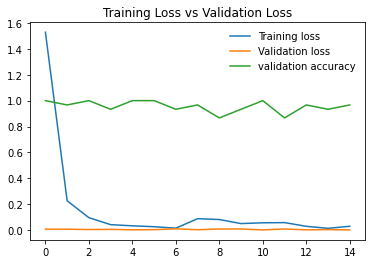

In [79]:
plt.plot(train_loss, label = 'Training loss')
plt.plot(valid_loss,  label = 'Validation loss')
plt.plot(valid_accuracy, label = "validation accuracy")
plt.legend(frameon = False)
plt.title('Training Loss vs Validation Loss')
plt.show()

In [80]:
best_model = torch.load("models/"+f"bestmodel.pth")
model.load_state_dict(best_model)

<All keys matched successfully>

In [39]:
 class_to_idx = train_data.class_to_idx
idx_to_class = {class_to_idx[k]: k for k in class_to_idx}

In [42]:
 import json
 
with open('flower_data/cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
print(cat_to_name)

{'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose', '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower', '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger', '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily', '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle', '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris', '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan', '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea', '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orchid', '54': 's

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

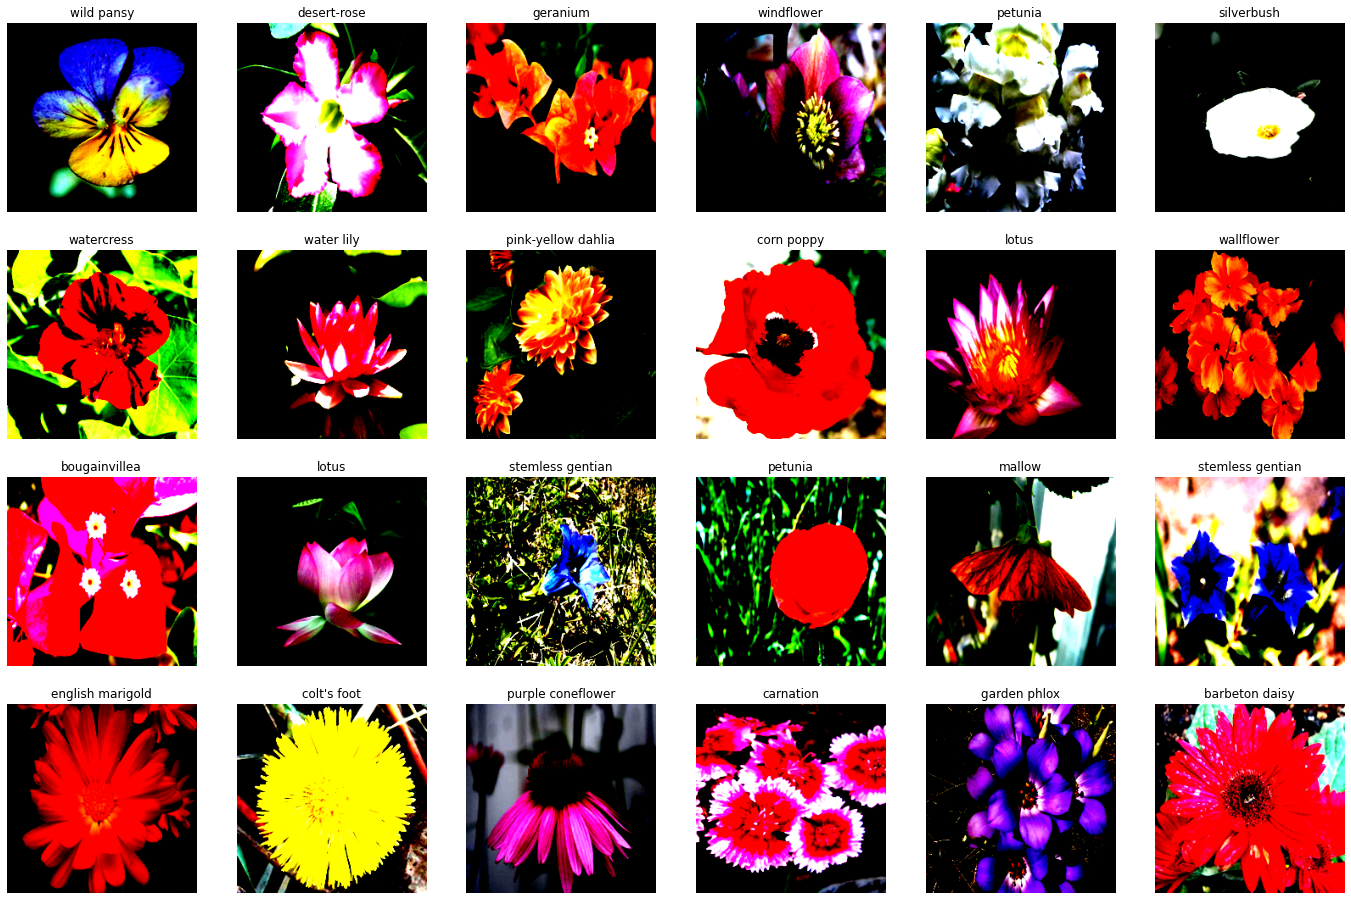

In [43]:
samples, _ = iter(valid_loader).next()
samples = samples.to(device)
fig = plt.figure(figsize=(24, 16))
fig.tight_layout()
output = model(samples[:24])
pred = torch.argmax(output, dim=1)
pred = [p.item() for p in pred]
 
for num, sample in enumerate(samples[:24]):
    plt.subplot(4,6,num+1)
    plt.title(cat_to_name[idx_to_class[pred[num]]])
    plt.axis('off')
    sample = sample.cpu().numpy()
    plt.imshow(np.transpose(sample, (1,2,0)))

In [52]:
df = pd.read_csv("flower_data/Sample_Sub.csv")
df.head()

,id,class
0,image_03785.jpg,0
1,image_07662.jpg,0
2,image_04393.jpg,0
3,image_05361.jpg,0
4,image_05759.jpg,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      818 non-null    object
 1   class   818 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.9+ KB


In [55]:
 class loadTest(Dataset):
    def __init__(self, dir, df, file_class, transform = None):
        self.file_list = [x for x in df[file_class]]
        self.dir = dir
        self.transform = transform
            
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        img = Image.open(os.path.join(self.dir, self.file_list[idx]))
        if self.transform:
            img = self.transform(img)
            img = img.numpy()
            return img.astype('float32'), self.file_list[idx]

In [56]:
 #applying some transformation to the image while converting to tensor
transform = transforms.Compose([transforms.Resize([224,224]),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                               ])
 
test= "flower_data/test"
test_data = loadTest(test, df, "id", transform = transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers= num_workers)

In [81]:
model.eval()
fn_list = []
pred_list = []
for x, fn in testloader:
    with torch.no_grad():
        x = x.to(device)
        output = model(x)
        pred = torch.argmax(output, dim=1)
        fn_list += [n for n in fn]
        pred_list += [idx_to_class[p.item()] for p in pred]
 
submission = pd.DataFrame({"id":fn_list, "class":pred_list})
submission.to_csv('submission2.csv', index=False)

In [ ]:
model = vggnet
model.train
loss= 0
train_counter = 0
for i in range(10):
    for sample, labels in train_loader:
        train_counter +=1
        sample, labels = sample.to(device), labels.to(device)
        optimiser.zero_grad()
        forward= model(sample)
        epoch_loss = criterion( forward, labels)
        epoch_loss.backward()
        optimizer.step()
        loss += epoch_loss.item()
        print(loss, train_counter, forward.shape)
    print(i, loss,train_counter)

0 0 0
1 0 0
2 0 0
3 0 0
4 0 0
5 0 0
6 0 0
7 0 0
8 0 0
9 0 0


In [ ]:
 directory = "models/"
train_loss, valid_loss, valid_accuracy = [],[],[]
epoch = 10
model= MLP
model.to(device)

for x in range(epoch):
 
    if not os.path.exists(directory):
        os.makedirs(directory)
    model.train
    loss= 0
    train_counter = 0
    for q, (sample, labels) in tqdm(enumerate(train_loader),total=int(len(train_data)/train_loader.batch_size) ):
        train_counter +=1
        sample, labels = sample.to(device), labels.to(device)
        N0 = sample.shape[0]
        optimiser.zero_grad()
        forward= MLP(sample)
        epoch_loss = criterion( forward, labels)
        epoch_loss.backward()
        optimizer.step()
        loss += epoch_loss.item()
 
    loss = loss/train_loader.batch_size
    train_loss.append(loss)
 
    val_loss = 0
    accuracy = 0
    model.eval()
    with torch.no_grad():
        for sample, labels in valid_loader:
            sample, labels = sample.to(device), labels.to(device)
            forward = model(sample)
            val_los = criterion(labels,forward)
            val_loss = val_los.item()
            forward = F.softmax(forward)
            top_k, top_class = forward.topk(1, dim=1)
            eval= labels == top_class.view(labels.shape)
            accuracy = torch.mean(eval.type(torch.FloatTensor))
 
    val_loss /= len(valid_loader)
    valid_loss.append(val_loss)
    valid_accuracy.append(accuracy)
    print(f"Epoch {x}/{epoch}.......training loss {loss:.6f}...... validation loss {val_loss:.6f}....... validation accuracy {accuracy}")
 
    if early_stopping.early_stop:
        print(f"Early stopping at epoch {x}.......")
        break

  0%|          | 0/204 [00:00<?, ?it/s]


RuntimeError: ignored